In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

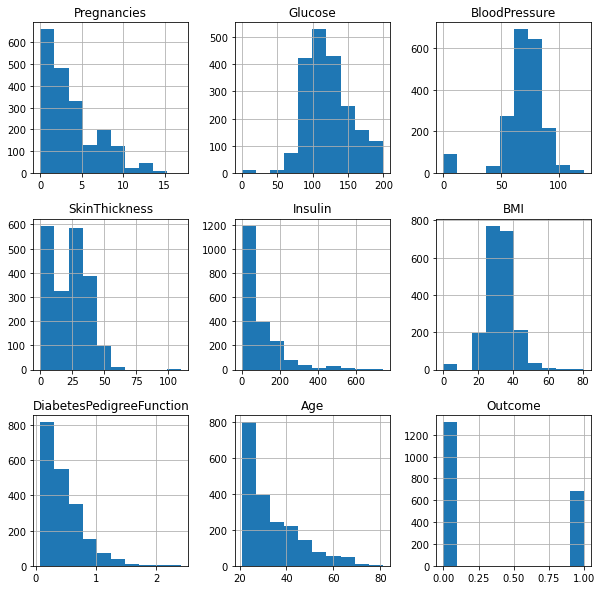

In [6]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

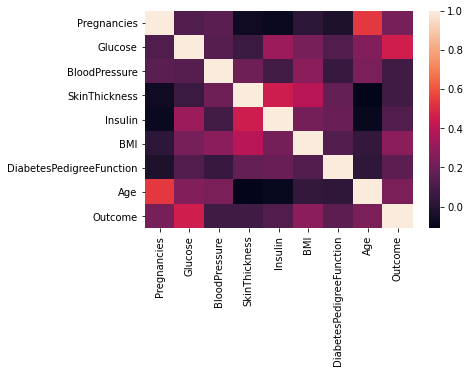

In [8]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

<AxesSubplot:xlabel='count', ylabel='Outcome'>

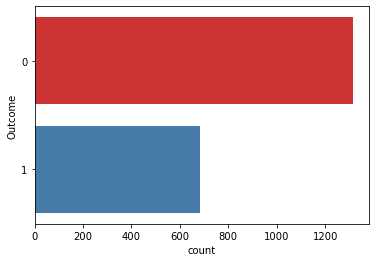

In [9]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

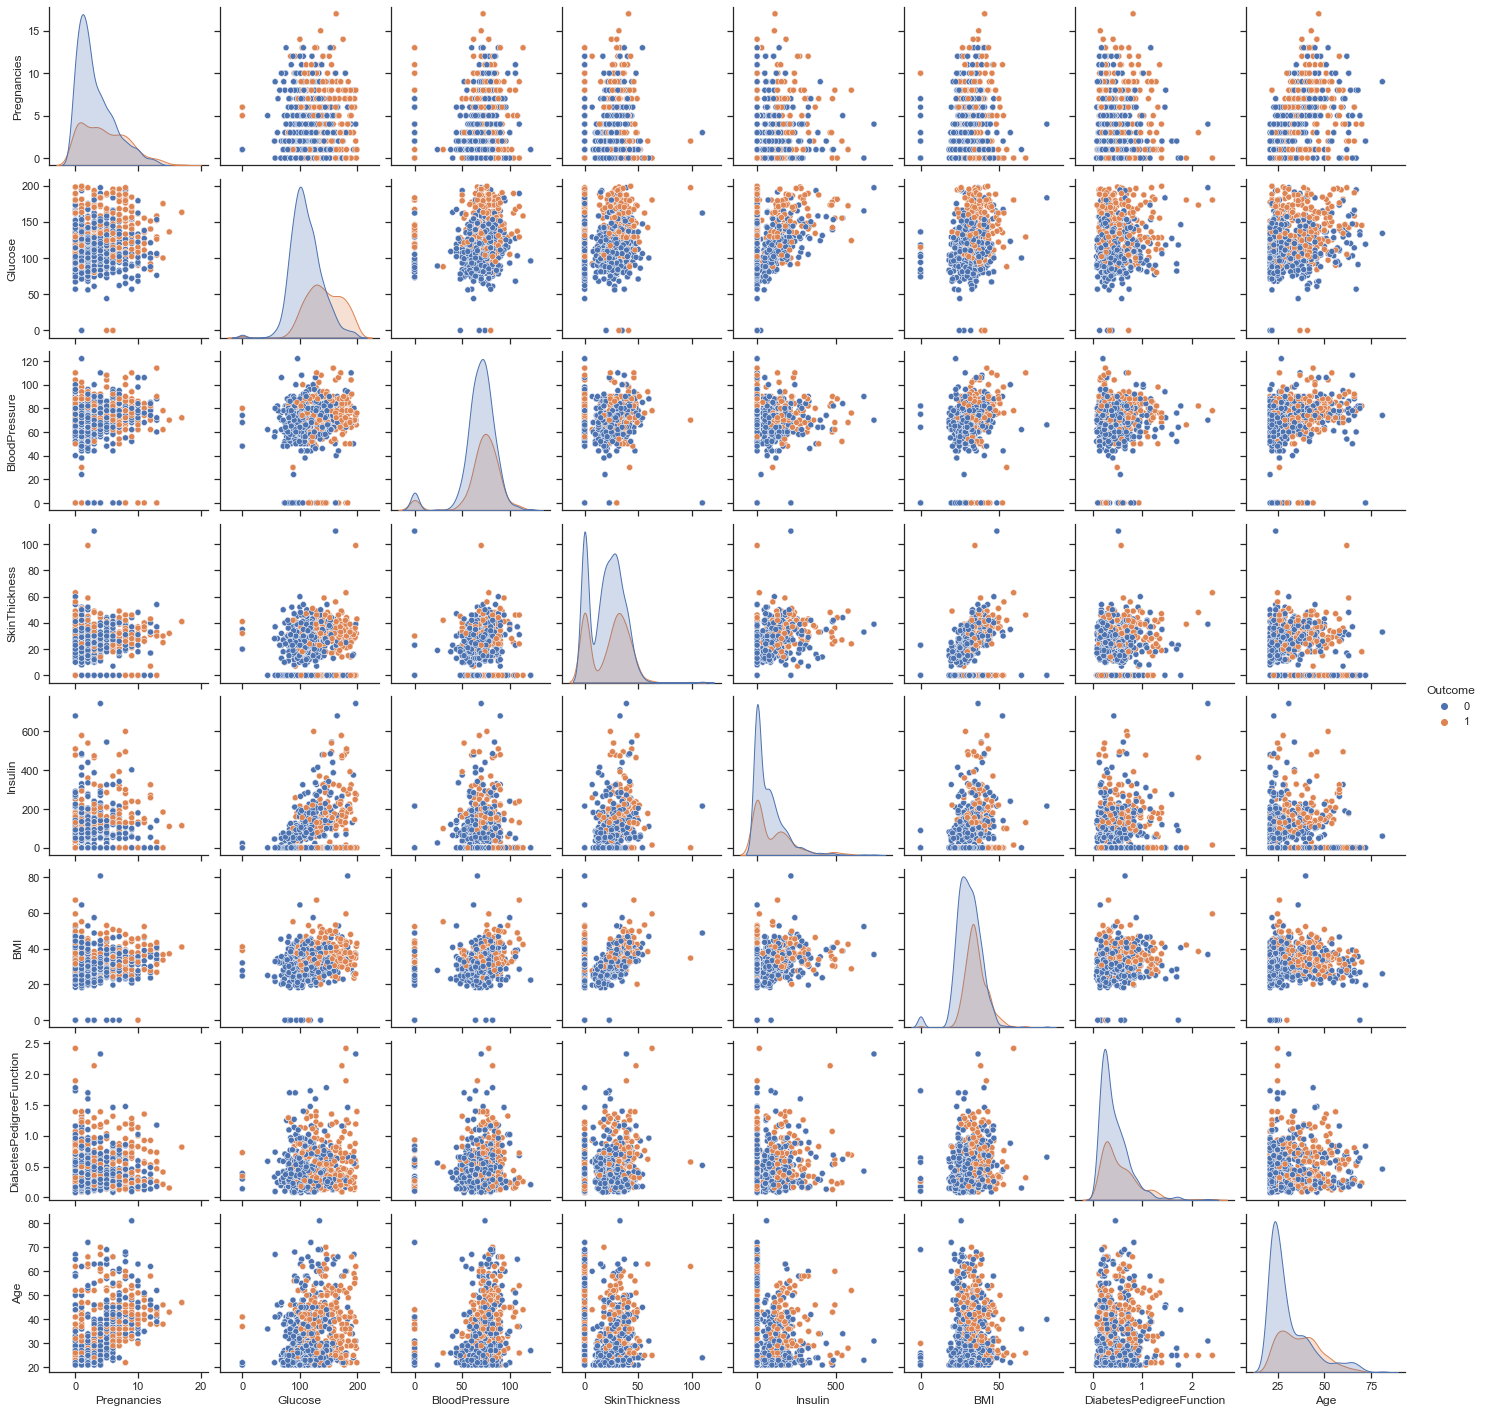

In [10]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<AxesSubplot:>

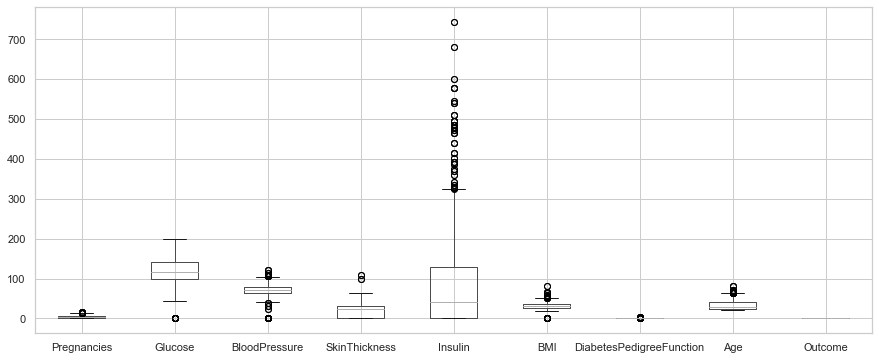

In [11]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

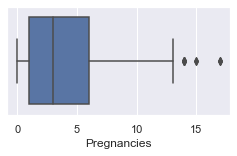

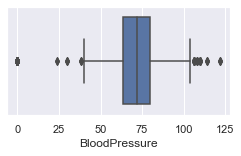

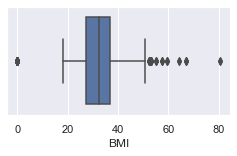

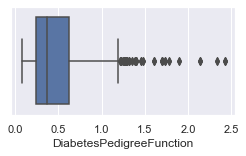

In [42]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Pregnancies'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [13]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))


---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [14]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

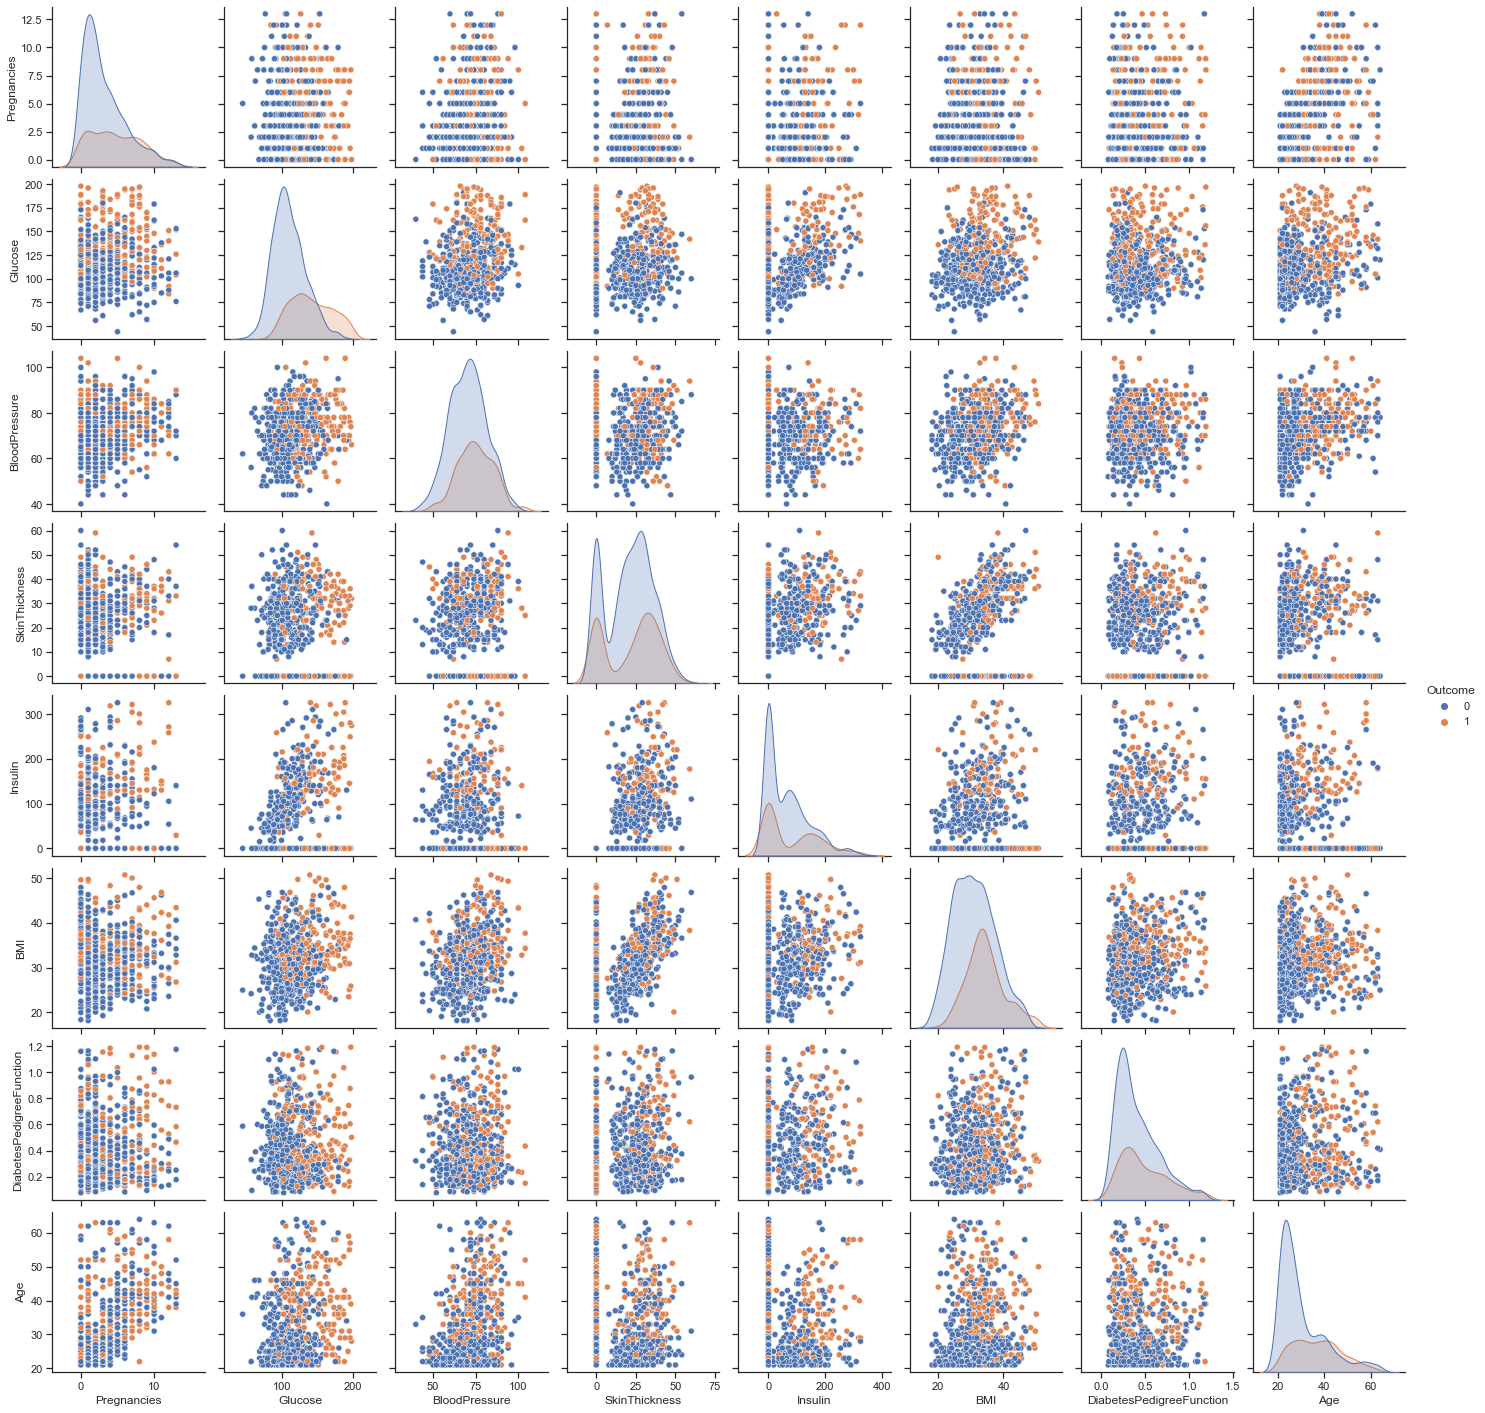

In [15]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

# Covariance and stuff after data cleaning

## calculating co and stuff

In [16]:
# Calculate covariance matrix for all columns with respect to the target column
covariance_matrix_dt = df_out.cov()
rounded_cov_matrix = np.round(covariance_matrix_dt, decimals=3)
df_covariance_matrix_dt = pd.DataFrame(rounded_cov_matrix)
# Calculate correlation matrix for all columns with respect to the target column
correlation_matrix_dt = df_out.corr()
rounded_corr_matrix = np.round(correlation_matrix_dt, decimals=3)
df_correlation_matrix_dt = pd.DataFrame(rounded_corr_matrix)
# Calculate variance for all columns with respect to the target column
variance_dt = df_out.var()
rounded_var_matrix = np.round(variance_dt, decimals=3)
df_variance_dt = pd.DataFrame(rounded_var_matrix)

In [17]:
print("\nCorrelation Matrix:")
df_correlation_matrix_dt.head(50)


Correlation Matrix:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.130,0.180,-0.073,-0.105,0.023,0.030,0.563,0.232
Glucose,0.130,1.000,0.219,0.033,0.278,0.188,0.060,0.268,0.503
BloodPressure,0.180,0.219,1.000,0.076,-0.032,0.278,0.040,0.339,0.187
SkinThickness,-0.073,0.033,0.076,1.000,0.482,0.422,0.132,-0.075,0.037
Insulin,-0.105,0.278,-0.032,0.482,1.000,0.212,0.220,-0.044,0.102
BMI,0.023,0.188,0.278,0.422,0.212,1.000,0.135,0.065,0.251
DiabetesPedigreeFunction,0.030,0.060,0.040,0.132,0.220,0.135,1.000,0.058,0.153
Age,0.563,0.268,0.339,-0.075,-0.044,0.065,0.058,1.000,0.298
Outcome,0.232,0.503,0.187,0.037,0.102,0.251,0.153,0.298,1.000


In [18]:
print("covariance_matrix:")
df_covariance_matrix_dt.head(50)

covariance_matrix:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,10.119,12.011,6.273,-3.507,-27.656,0.482,0.025,19.093,0.341
Glucose,12.011,849.435,69.985,14.803,667.772,35.302,0.451,83.106,6.792
BloodPressure,6.273,69.985,120.592,12.756,-28.787,19.737,0.113,39.708,0.950
SkinThickness,-3.507,14.803,12.756,231.003,605.186,41.372,0.514,-12.087,0.262
Insulin,-27.656,667.772,-28.787,605.186,6811.791,112.755,4.652,-38.402,3.904
BMI,0.482,35.302,19.737,41.372,112.755,41.668,0.223,4.479,0.750
DiabetesPedigreeFunction,0.025,0.451,0.113,0.514,4.652,0.223,0.066,0.158,0.018
Age,19.093,83.106,39.708,-12.087,-38.402,4.479,0.158,113.500,1.473
Outcome,0.341,6.792,0.950,0.262,3.904,0.750,0.018,1.473,0.215


In [19]:
print("Variance for Each Column with Respect to Target Column:")
df_variance_dt.head(50)

Variance for Each Column with Respect to Target Column:


,0
Pregnancies,10.119
Glucose,849.435
BloodPressure,120.592
SkinThickness,231.003
Insulin,6811.791
BMI,41.668
DiabetesPedigreeFunction,0.066
Age,113.500
Outcome,0.215


## plotting the graphs of co and stuff

<AxesSubplot:>

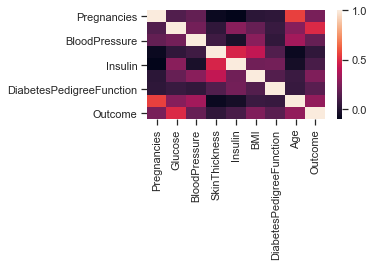

In [20]:
sns.heatmap(df_out.corr())

# Number of unique values and other stuff

## Count of unique values

In [21]:
for i in df_out.columns:
    print("##", i , "##")
    #print(set(X[i].tolist()))
    unique_set = set(df_out[i])
    unique_count = len(unique_set)
    print("Count of unique values using a set:", unique_count)

## Pregnancies ##
Count of unique values using a set: 14
## Glucose ##
Count of unique values using a set: 130
## BloodPressure ##
Count of unique values using a set: 38
## SkinThickness ##
Count of unique values using a set: 49
## Insulin ##
Count of unique values using a set: 148
## BMI ##
Count of unique values using a set: 224
## DiabetesPedigreeFunction ##
Count of unique values using a set: 433
## Age ##
Count of unique values using a set: 44
## Outcome ##
Count of unique values using a set: 2


## All unique values

In [22]:
for i in df_out.columns:
    print("##", i , "##")
    print(set(df_out[i].tolist()))

## Pregnancies ##
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
## Glucose ##
{44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 191, 193, 194, 195, 196, 197, 198}
## BloodPressure ##
{40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104}
## SkinThickness ##
{0, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3

## Count

In [23]:
print('Value of each column')
print('\n')
for col in df_out.columns:
    print(col)
    print(df_out[col].value_counts())
    print("\n")

Value of each column


Pregnancies
1     300
0     240
2     235
4     169
3     164
5     117
6     104
7      88
8      73
9      58
10     48
12     23
11     17
13     16
Name: Pregnancies, dtype: int64


Glucose
99     42
100    38
102    36
95     36
106    33
       ..
198     2
67      2
186     2
191     2
44      2
Name: Glucose, Length: 130, dtype: int64


BloodPressure
70     131
74     130
78     110
68     110
64     108
72     108
60      88
80      85
76      80
62      79
88      62
82      60
66      59
84      55
58      51
86      51
90      47
54      31
56      29
52      24
50      22
65      19
75      17
94      15
85      12
48      11
44       9
92       9
96       8
100      6
104      5
55       4
61       4
102      3
46       3
98       3
95       2
40       2
Name: BloodPressure, dtype: int64


SkinThickness
0     429
32     78
30     60
27     55
28     52
39     48
23     48
18     45
31     45
25     43
29     42
40     42
17     41
22     38
37     3

# Entropy

In [24]:
def calc_entropy(column):
    counts=np.bincount(column) #This code will return the number of each unique value in a column
    probability=counts/(len(column))#here we calculate the probability of each value vy dividing the length of the entire column
    entropy=0#we start 0 as the intial value of entropy
    for prob in probability: # here we a for loop to go throuh each probability of each unique value in the column
        if prob >0:
            entropy += prob * math.log(prob, 2) # here calculate entropy of each value and add them to find the total emtropy
    return -entropy # we should return - * entropy due to the formula
    
    

In [25]:
def three_deci_calc_entropy(column):
    td_ce=calc_entropy(column)
    rounded_number_td_ce = round(td_ce, 3)
    return rounded_number_td_ce

In [26]:
print(three_deci_calc_entropy(df_out['Pregnancies']))
print(three_deci_calc_entropy(df_out['Glucose']))
print(three_deci_calc_entropy(df_out['BloodPressure']))
print(three_deci_calc_entropy(df_out['SkinThickness']))
print(three_deci_calc_entropy(df_out['Insulin']))
print(three_deci_calc_entropy(df_out['BMI']))
print(three_deci_calc_entropy(df_out['DiabetesPedigreeFunction']))
print(three_deci_calc_entropy(df_out['Age']))

3.401
6.634
4.597
4.68
4.674
4.66
0.242
4.89


In [27]:
print(calc_entropy(df_out['Pregnancies']))
print(calc_entropy(df_out['Glucose']))
print(calc_entropy(df_out['BloodPressure']))
print(calc_entropy(df_out['SkinThickness']))
print(calc_entropy(df_out['Insulin']))
print(calc_entropy(df_out['BMI']))
print(calc_entropy(df_out['DiabetesPedigreeFunction']))
print(calc_entropy(df_out['Age']))

3.401254959805962
6.634021841554912
4.597125935694893
4.67960709604702
4.674266222817011
4.66038704012829
0.2420701129302397
4.889726579925036


# Information Gain

In [28]:
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    oe_s=original_entropy - subract
    rounded_number_oe_s = round(oe_s, 3)
    return  rounded_number_oe_s

In [29]:
print(information_gain(df_out,"Pregnancies","Outcome"))
print(information_gain(df_out,"Glucose","Outcome"))
print(information_gain(df_out,"BloodPressure","Outcome"))
print(information_gain(df_out,"SkinThickness","Outcome"))
print(information_gain(df_out,"Insulin","Outcome"))
print(information_gain(df_out,"BMI","Outcome"))
print(information_gain(df_out,"DiabetesPedigreeFunction","Outcome"))
print(information_gain(df_out,"Age","Outcome"))

0.688
0.881
0.821
0.859
0.459
0.88
0.891
0.855


# extract features and targets plus split train test data

In [30]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [31]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [32]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

# Implementing models

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

## result metrics

In [59]:
accu=[]
prec=[]
reca=[]
f1Sc=[]
ROCS=[]
PRSC=[]

## LR

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [50]:
clf_lr=LogisticRegression()
clf_lr.fit(train_X,train_y)
y_pred_lr=clf_lr.predict(test_X)
#find accuracy
ac_lr=accuracy_score(test_y,y_pred_lr)

E:\phython\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
rc_lr=roc_auc_score(test_y,y_pred_lr)
accuracy_lr = accuracy_score(test_y, y_pred_lr)
precision_lr = precision_score(test_y, y_pred_lr)
recall_lr = recall_score(test_y, y_pred_lr)
f1_lr = f1_score(test_y, y_pred_lr)
auc_pr_lr = average_precision_score(test_y, y_pred_lr)

In [57]:
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("ROC AUC:", rc_lr)
print("AUC-PR:", auc_pr_lr)

Accuracy: 0.8217522658610272
Precision: 0.7721518987341772
Recall: 0.5980392156862745
F1-Score: 0.6740331491712707
ROC AUC: 0.7597182977994692
AUC-PR: 0.5856441853960598


In [60]:
accu.append(accuracy_lr)
prec.append(precision_lr)
reca.append(recall_lr)
f1Sc.append(f1_lr)
ROCS.append(rc_lr)
PRSC.append(auc_pr_lr)

In [61]:
print(accu)
print(prec)
print(reca)
print(f1Sc)
print(ROCS)
print(PRSC)

[0.8217522658610272]
[0.7721518987341772]
[0.5980392156862745]
[0.6740331491712707]
[0.7597182977994692]
[0.5856441853960598]


In [34]:
'''#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()'''

E:\phython\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\phython\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy 0.8217522658610272 ROC 0.7597182977994692


E:\phython\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\phython\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TP:  [22 17 16 22 19 26 25 21 21 26]
TN:  [83 86 82 82 85 85 86 77 81 76]
FN:  [20 24 25 19 22 15 16 21 21 16]
FP:  [ 8  5  9  9  6  6  5 13  9 14]


E:\phython\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [79]:
from sklearn.svm import SVC

clf_svm=SVC(kernel='linear')
clf_svm.fit(train_X,train_y)
y_pred_svm=clf_svm.predict(test_X)

In [80]:
#Runnung he metrics
rc_svm=roc_auc_score(test_y,y_pred_svm)
accuracy_svm = accuracy_score(test_y, y_pred_svm)
precision_svm = precision_score(test_y, y_pred_svm)
recall_svm = recall_score(test_y, y_pred_svm)
f1_svm = f1_score(test_y, y_pred_svm)
auc_pr_svm = average_precision_score(test_y, y_pred_svm)

#printing the Result
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("ROC AUC:", rc_svm)
print("AUC-PR:", auc_pr_svm)

Accuracy: 0.8096676737160121
Precision: 0.7746478873239436
Recall: 0.5392156862745098
F1-Score: 0.6358381502890174
ROC AUC: 0.734673345320661
AUC-PR: 0.5596962498884069


In [64]:
#Adding to the List
accu.append(accuracy_svm)
prec.append(precision_svm)
reca.append(recall_svm)
f1Sc.append(f1_svm)
ROCS.append(rc_svm)
PRSC.append(auc_pr_svm)

#Printing the List
print(accu)
print(prec)
print(reca)
print(f1Sc)
print(ROCS)
print(PRSC)

[0.8217522658610272, 0.8096676737160121]
[0.7721518987341772, 0.7746478873239436]
[0.5980392156862745, 0.5392156862745098]
[0.6740331491712707, 0.6358381502890174]
[0.7597182977994692, 0.734673345320661]
[0.5856441853960598, 0.5596962498884069]


## SVM poly

In [106]:
'''svm = SVC(kernel='poly',degree=5, random_state=42)
svm.fit(train_X,train_y)
y_pred_SVM = svm.predict(test_X)'''

In [107]:
'''#Runnung he metrics
rc_SVM=roc_auc_score(test_y,y_pred_SVM)
accuracy_SVM = accuracy_score(test_y, y_pred_SVM)
precision_SVM = precision_score(test_y, y_pred_SVM)
recall_SVM = recall_score(test_y, y_pred_SVM)
f1_SVM = f1_score(test_y, y_pred_SVM)
auc_pr_SVM = average_precision_score(test_y, y_pred_SVM)

#printing the Result
print("Accuracy:", accuracy_SVM)
print("Precision:", precision_SVM)
print("Recall:", recall_SVM)
print("F1-Score:", f1_SVM)
print("ROC AUC:", rc_SVM)
print("AUC-PR:", auc_pr_SVM)'''

Accuracy: 0.8036253776435045
Precision: 0.7936507936507936
Recall: 0.49019607843137253
F1-Score: 0.6060606060606061
ROC AUC: 0.7167137597397036
AUC-PR: 0.5461442045767618


In [35]:
'''#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()'''


Accuracy 0.8096676737160121 ROC 0.734673345320661
TP:  [21 17 17 21 19 26 25 22 21 26]
TN:  [84 84 84 81 86 83 85 77 83 74]
FN:  [21 24 24 20 22 15 16 20 21 16]
FP:  [ 7  7  7 10  5  8  6 13  7 16]


## RFC

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc=RandomForestClassifier(n_estimators=100, random_state=1)
clf_rfc.fit(train_X,train_y)

y_pred_rfc=clf_rfc.predict(test_X)

In [77]:
#Runnung he metrics
rc_rfc=roc_auc_score(test_y,y_pred_rfc)
accuracy_rfc = accuracy_score(test_y, y_pred_rfc)
precision_rfc = precision_score(test_y, y_pred_rfc)
recall_rfc = recall_score(test_y, y_pred_rfc)
f1_rfc = f1_score(test_y, y_pred_rfc)
auc_pr_rfc = average_precision_score(test_y, y_pred_rfc)

#printing the Result
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1-Score:", f1_rfc)
print("ROC AUC:", rc_rfc)
print("AUC-PR:", auc_pr_rfc)

Accuracy: 0.9788519637462235
Precision: 1.0
Recall: 0.9313725490196079
F1-Score: 0.9644670050761421
ROC AUC: 0.9656862745098039
AUC-PR: 0.9525205852733843


In [81]:
#Adding to the List
accu.append(accuracy_rfc)
prec.append(precision_rfc)
reca.append(recall_rfc)
f1Sc.append(f1_rfc)
ROCS.append(rc_rfc)
PRSC.append(auc_pr_rfc)

#Printing the List
print(accu)
print(prec)
print(reca)
print(f1Sc)
print(ROCS)
print(PRSC)

[0.8217522658610272, 0.8096676737160121, 0.9788519637462235]
[0.7721518987341772, 0.7746478873239436, 1.0]
[0.5980392156862745, 0.5392156862745098, 0.9313725490196079]
[0.6740331491712707, 0.6358381502890174, 0.9644670050761421]
[0.7597182977994692, 0.734673345320661, 0.9656862745098039]
[0.5856441853960598, 0.5596962498884069, 0.9525205852733843]


In [90]:
'''#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
precise = precision_score(test_y, y_pred)
print("\nAccuracy {0} ROC {1} precision {2}".format(ac,rc,precise))

#cross val score

result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()'''


Accuracy 0.972809667673716 ROC 0.9558823529411764 precision 1.0
TP:  [41 35 37 35 41 38 40 40 41 42]
TN:  [91 87 91 91 90 91 90 86 89 85]
FN:  [1 6 4 6 0 3 1 2 1 0]
FP:  [0 4 0 0 1 0 1 4 1 5]


,Actual,Predicted
82,0,0
1279,0,0
962,0,0
810,0,0
828,0,0


## GBC

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf_gbc.fit(train_X,train_y)
y_pred_gbc=clf_gbc.predict(test_X)

In [84]:
#Runnung he metrics
rc_gbc=roc_auc_score(test_y,y_pred_gbc)
accuracy_gbc = accuracy_score(test_y, y_pred_gbc)
precision_gbc = precision_score(test_y, y_pred_gbc)
recall_gbc = recall_score(test_y, y_pred_gbc)
f1_gbc = f1_score(test_y, y_pred_gbc)
auc_pr_gbc = average_precision_score(test_y, y_pred_gbc)

#printing the Result
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1-Score:", f1_gbc)
print("ROC AUC:", rc_gbc)
print("AUC-PR:", auc_pr_gbc)

Accuracy: 0.9033232628398792
Precision: 0.8977272727272727
Recall: 0.7745098039215687
F1-Score: 0.831578947368421
ROC AUC: 0.8676042469389502
AUC-PR: 0.7647849788088814


In [85]:
#Adding to the List
accu.append(accuracy_gbc)
prec.append(precision_gbc)
reca.append(recall_gbc)
f1Sc.append(f1_gbc)
ROCS.append(rc_gbc)
PRSC.append(auc_pr_gbc)

#Printing the List
print(accu)
print(prec)
print(reca)
print(f1Sc)
print(ROCS)
print(PRSC)

[0.8217522658610272, 0.8096676737160121, 0.9788519637462235, 0.9033232628398792]
[0.7721518987341772, 0.7746478873239436, 1.0, 0.8977272727272727]
[0.5980392156862745, 0.5392156862745098, 0.9313725490196079, 0.7745098039215687]
[0.6740331491712707, 0.6358381502890174, 0.9644670050761421, 0.831578947368421]
[0.7597182977994692, 0.734673345320661, 0.9656862745098039, 0.8676042469389502]
[0.5856441853960598, 0.5596962498884069, 0.9525205852733843, 0.7647849788088814]


Confusion Matrix:
[[220   9]
 [ 23  79]]


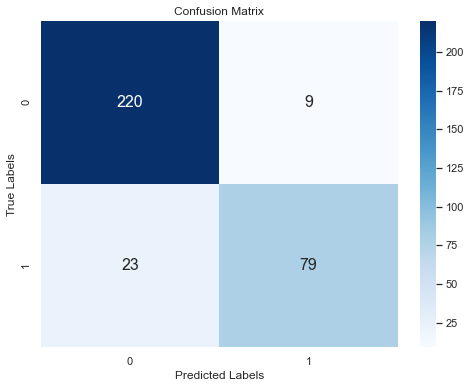

In [105]:
conf_mat_gbc = confusion_matrix(test_y,y_pred_gbc)

print("Confusion Matrix:")
print(conf_mat_gbc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_gbc, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
'''#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()'''


Accuracy 0.9033232628398792 ROC 0.8676042469389502
TP:  [28 28 29 27 27 30 30 27 32 34]
TN:  [88 87 88 85 88 82 86 82 86 82]
FN:  [14 13 12 14 14 11 11 15 10  8]
FP:  [3 4 3 6 3 9 5 8 4 8]


## DT

In [91]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(train_X,train_y)
y_pred_dt = clf_dt.predict(test_X)

In [93]:
#Runnung he metrics
rc_dt=roc_auc_score(test_y,y_pred_dt)
accuracy_dt = accuracy_score(test_y, y_pred_dt)
precision_dt = precision_score(test_y, y_pred_dt)
recall_dt = recall_score(test_y, y_pred_dt)
f1_dt = f1_score(test_y, y_pred_dt)
auc_pr_dt = average_precision_score(test_y, y_pred_dt)

#printing the Result
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("ROC AUC:", rc_dt)
print("AUC-PR:", auc_pr_dt)

Accuracy: 0.9758308157099698
Precision: 1.0
Recall: 0.9215686274509803
F1-Score: 0.9591836734693878
ROC AUC: 0.9607843137254901
AUC-PR: 0.9457378117410106


In [94]:
#Adding to the List
accu.append(accuracy_dt)
prec.append(precision_dt)
reca.append(recall_dt)
f1Sc.append(f1_dt)
ROCS.append(rc_dt)
PRSC.append(auc_pr_dt)

#Printing the List
print(accu)
print(prec)
print(reca)
print(f1Sc)
print(ROCS)
print(PRSC)

[0.8217522658610272, 0.8096676737160121, 0.9788519637462235, 0.9033232628398792, 0.9758308157099698]
[0.7721518987341772, 0.7746478873239436, 1.0, 0.8977272727272727, 1.0]
[0.5980392156862745, 0.5392156862745098, 0.9313725490196079, 0.7745098039215687, 0.9215686274509803]
[0.6740331491712707, 0.6358381502890174, 0.9644670050761421, 0.831578947368421, 0.9591836734693878]
[0.7597182977994692, 0.734673345320661, 0.9656862745098039, 0.8676042469389502, 0.9607843137254901]
[0.5856441853960598, 0.5596962498884069, 0.9525205852733843, 0.7647849788088814, 0.9457378117410106]


# Comparison Matrix

In [108]:
import pandas as pd
matrix = np.array([accu,prec,reca,f1Sc,ROCS,PRSC])

columns = ['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT']
index = ['accuracy','precision','recall','f1Score','ROC score','PR Score']

df = pd.DataFrame(data=matrix, columns=columns, index=index)

# Print the matrix
df.head(10)

,Logistic Regression,SVM,Random Forest,Gradient Boosting,DT
accuracy,0.821752,0.809668,0.978852,0.903323,0.975831
precision,0.772152,0.774648,1.000000,0.897727,1.000000
recall,0.598039,0.539216,0.931373,0.774510,0.921569
f1Score,0.674033,0.635838,0.964467,0.831579,0.959184
ROC score,0.759718,0.734673,0.965686,0.867604,0.960784
PR Score,0.585644,0.559696,0.952521,0.764785,0.945738


In [111]:
rounded_df = np.round(df, decimals=3)
rounded_df.head()

,Logistic Regression,SVM,Random Forest,Gradient Boosting,DT
accuracy,0.822,0.810,0.979,0.903,0.976
precision,0.772,0.775,1.000,0.898,1.000
recall,0.598,0.539,0.931,0.775,0.922
f1Score,0.674,0.636,0.964,0.832,0.959
ROC score,0.760,0.735,0.966,0.868,0.961


# Plotting results for each

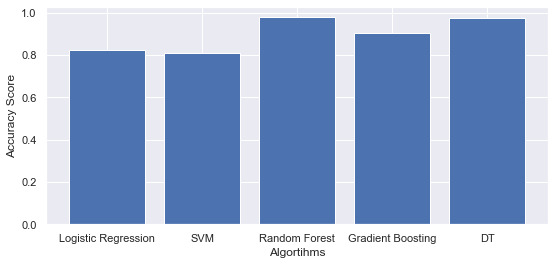

In [95]:
#Accu
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],accu,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

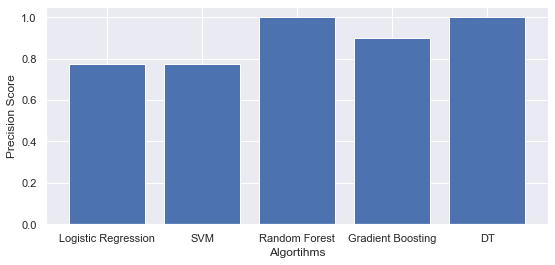

In [96]:
#Precision
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],prec,label='Precision')
plt.ylabel('Precision Score')
plt.xlabel('Algortihms')
plt.show()

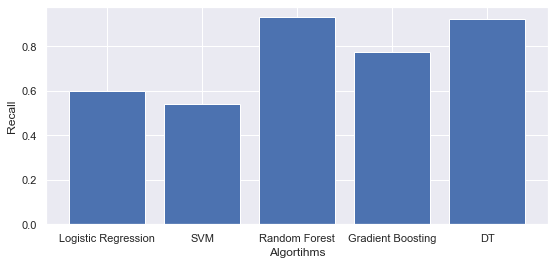

In [102]:
#Recall
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],reca,label='Recall')
plt.ylabel('Recall')
plt.xlabel('Algortihms')
plt.show()

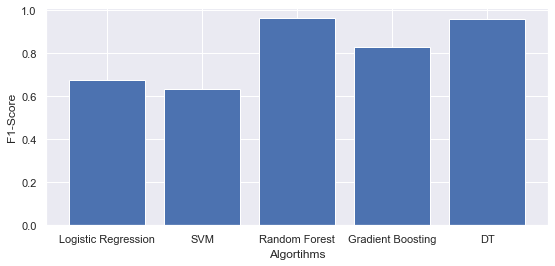

In [98]:
#F1-Score
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],f1Sc,label='F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Algortihms')
plt.show()

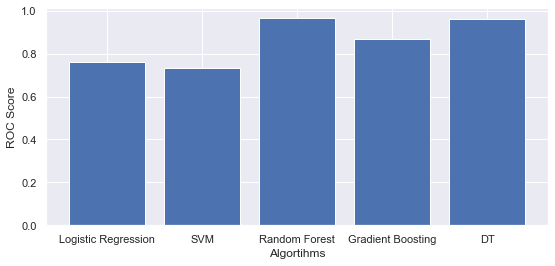

In [99]:
#ROC
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],ROCS,label='ROC')
plt.ylabel('ROC Score')
plt.xlabel('Algortihms')
plt.show()

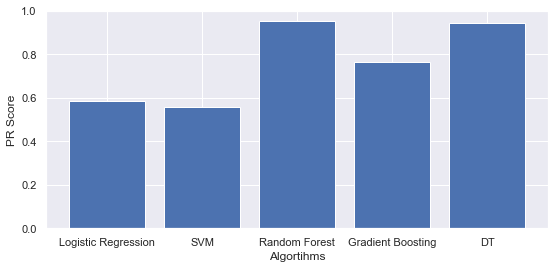

In [100]:
#PR
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','Random Forest','Gradient Boosting','DT'],PRSC,label='PR')
plt.ylabel('PR Score')
plt.xlabel('Algortihms')
plt.show()

In [36]:
'''#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()'''


Accuracy 0.8851963746223565 ROC 0.8545038102577275
TP:  [31 27 30 26 31 30 28 32 30 39]
TN:  [86 81 81 82 85 73 85 79 81 79]
FN:  [11 14 11 15 10 11 13 10 12  3]
FP:  [ 5 10 10  9  6 18  6 11  9 11]


In [38]:
'''#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()'''


Accuracy 0.7885196374622356 ROC 0.7465750492336672
TP:  [20 22 20 25 22 27 29 25 26 29]
TN:  [78 76 80 72 83 81 77 69 78 72]
FN:  [22 19 21 16 19 14 12 17 16 13]
FP:  [13 15 11 19  8 10 14 21 12 18]


In [41]:
#Great....
#Random forest has highest accuracy 98% and ROC_AUC curve 97%
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient

#model can be improve with fine tunning